**Group 84**

**Team member:**

**Yeong Jer Tseng (ytseng35)**

**Ting Liao (tliao32)**

**Po Hsien Hsu (phsu40)**

[COVID Simulation Project Github](https://github.gatech.edu/phsu40/CSE6730-Covid-Simulation.git)


# Abstract

# Motivation
COVID-19 has been drastically changing the world during the past year. Throughout all the countries suffering from the pandemics, some countries dealt with it well by enforcing people wearing masks and social distancing, starting from the early stage of the pandemic. Therefore, we would like to model the pandemic to understand the behavior of the virus on human beings through compartmental models such as SIR/SEIR/SEIRD with the topological interaction via Cellular Automata (CA) [9] and then to study the influence of masks/vaccine/social distancing on controlling the outbreak with Agent-Based Model (ABM) [1] [3].

# Introduction
To simulate models in epidemiology, compartmental models were commonly implemented to represent how individuals in a different state during a population interaction [5].

1. SIR

   The SIR model divides the total population size at time t denoted as P(t) into Susceptible S(t), Infectious I(t) and Recovered R(t). Hence, for the total population we can get P(t) = S(t) + I(t) + R(t).

2. SEIR

   The SEIR model considers an additional factor, Exposed E(t), based on the basic SIR model. That is, a person in the susceptible condition will first be exposed before infectious. Compared with SIR, SEIR accords more with reality. Hence, for the total population we can get P(t) = S(t) + E(t) + I(t) + R(t).
   
3. SEIRD

   In order to stimulate the real Covid-19 situation, we need to include the death population into our model. Therefore, we implement the SEIRD model which takes Death D(t) into consideration and we can get P(t) = S(t) + E(t) + I(t) + R(t) + D(t).



In order to model the interaction throughout people during the pandemics, a regular grid of identical was implemented as the topology during the modeling interaction. In the first stage of the program, Cellular Automata is implemented with the compartmental models above as the simple modeling where each cell represents as people. The neighboring cells provide an interaction for spreading the virus in the system. In the second stage of the model, we build an Agent-based Model on top of the grid topology to execute a more sophisticated simulation to study the influence of personal protected equipment and social distancing on the pandemics. 

1. Cellular Automata (CA)

   A Cellular Automata is a discrete model of computation studied in automata theory. It consists of a regular grid of cells, and it can be in any dimension. To do the simulation, an initial state will be given to each cell (time t=0). Then, while a new generation is created, each cell will be assigned a new state based on a fixed rule from the designer. Eventually, the grid of the cellular automata will show the final result of each cell's status after several iterations.

2. Agent-Based Model (ABM)

   ABM simulates the actions of the interactions of autonomous agents, environments, and time evolution.  

   - Agents represent individual or collective entities such as a person or organization. Each agent has its own independent characteristics, deciding the agent's behavior, goals, locations in the simulation.

   - Environments are the space where agents exist and interact with other agents. In ABM, the topological information differs from the case by case. In this project, we implement a grid similar to Cellular Automata as the topology of the interaction, but Network Interaction could also be implemented as environments in ABM.
   
   - Time contributes the "dynamic" to the simulation. During ABM simulation, it will go through a number of time steps where agents and environments update the states/characteristics. 


# Methods
## Stage One - Cellular Automata

  - Compartmental Models: SIR/SEIR/SEIRD

  - CA Components: 

    1. Cell

      Each cell represents a person object with attributes to keep track of the compartmental states, e.g., 0: Susceptible, 1: Infectious.

    2. Time (Day-Based)

      The dynamic system in CA will be updated on a daily basis.
      
  - CA Rule:

    - Initially, we randomly assigns the Susceptible status to some grids.

    - For SIR:

      - Susceptible status will become Infectious based on the infectious rate

      - Infectious status will become Recovered based on the recovered rate
      
    - For SEIR:

      - Susceptible status will become Exposed based on the infectious rate

      - Exposed status will become Infectious based on the latent diseased rate

      - Infectious status will become Recovered based on the recovered rate

    - For SEIRD:

      - Susceptible status will become Exposed based on the infectious rate

      - Exposed status will become Infectious based on the latent diseased rate

      - Infectious status will become Recovered based on the recovered rate or Died based on the death rate

## Stage Two - Agent-Based Model

  - Compartmental Models: SEIRD

  - ABM Components:

    1. Agents
    
      - Person:
        - Each person represents an individual with abilities to spread the virus and to get infected within our simulation.  

    2. Environments

      - For the environment or in another way the landscape of our simulation, we adopted a more simplify 2D-square grid topology. There would be 4 types of environments a Person (individual) could be located on the grid: House, Hospital, Office, or on their commuting path.

      - Grid Topology (2D-Square)

        - House: Where people stay with their family. It is time-dependable 

        - Hospital: Where infectious population with symptoms would be brought to isolation and treatment

        - Office: Where people would go to work according to their company

        - Commuting Path: Any potential cells besides a person's house, office, or a hospital within the grid 

    3. Time (Hour-Based)

      - Our ABM model would be based on an hourly-timed axis. Each Person (individual) would have their next move after each hour. They would be either commuting through random walk or staying at their designated Home or Office according to the time.

        - 19:00 - 06:59 -> Home (At House)

        - 07:00 - 08:59 -> Commute (Random Walk: 1 step/hr)

        - 09:00 - 16:59 -> Work (At Office)
        
        - 17:00 - 18:59 -> Commute (Random Walk: 1 step/hr)
        

  - ABM Rule:
    1. At the beginning of the simulation, the program will randomly generate a house, office, hospital and path objects onto the grid map. Later, the system will create a fixed number of people (Agent: Person). An initial small group of the population is infected with the pandemics serving as patient 0's.

    2. For the agent's house and office, they will be assigned with a fixed number of people. For example, each house has 4 people, and each office has 40 people as employees. Other than that, the hospital will be utilized as treating and isolating the infected people.

    3. On each day, people will follow the timetable designed by the system to execute the different tasks, which could be referred in the above paragraph. During the Commute period, all the people will "Random Walk" on the commuting paths. The starting point for all the people are decided by the houses and offices and the direction of the walk is randomly generated in each hour.

    4. The infecting process takes place when an infected person and the healthy ones are in the same cell during commuting. Also, in each house and office, the virus will be transmitted internally during work and home periods. Especially, the office adopts Cellular Automata model to model the discease transmission from the neighboring colleagues at work.

    5. Once a person is exposed to the virus, it will at least take 7 days before becoming infectious. During the exposure period, the person is still contagious to infect others. Infectious people are able to infect others during commute, home, and work periods.

    6. During each day, the system assigns a random number of people to wear masks and get vaccinated. Furthermore, the masked and vaccinated population increases as the day goes by to simulate the increasing number of masked and vaccinated population in the real world. Masks could decrease the infecting rate by 50%, and the vaccine can lower the rate by 90%. Also, there will be a chance for people to recover from the pandemics at the start of a day.

    7. Hospitalization is served as isoloation in the simulation since the patients will no longer contact with healthy people.


# Tutorial

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "drive/MyDrive/6730-Covid-Simulation-pohsienhsu/src"

/content/drive/.shortcut-targets-by-id/1F8HIetCtneEzKsbls0DEAsJ_Lnqg-Ty2/6730-Covid-Simulation-pohsienhsu/src


## Cellular Automata

## Model Building
In Cellular Automata model, the grid topology is required to implemented and each cell in the gril represents as a Person.

First, we create a Automata Class where is utilized to create the CA environement. The double for-loop fills the grid with the Person object, which has state and preState instance variable for future usage when the state have changed in each generation. 

In [5]:
from Cellular_Automata.constant import *
'''
<Model>
1. SIR
2. SEIR
3. SEIRD
'''
class Automata:
    def __init__(self, numcols, numrows):
        self.rows = numrows
        self.cols = numcols
        self.numpeople = numrows * numcols
        self.day = 0

        # grid
        self.people = []

        for i in range(numcols):
            column = []
            # Make a list of (row) cells for each column
            for j in range(numrows):
                person = self.getPerson()
                
                column.append(person)
            self.people.append(column)

class Person:
    def __init__(self):
        self.incubation = INCUBATION_DAYS
        self.prevState = 0
        self.state = 0

Since we plan to discuss SIR/SEIR/SEIRD model in CA, the states in each model vary. Therefore, we created child classes that inherit from Person class. As you can see below, taking SIR and SEIR for instance, the state 1 represents Infected in SIR but Exposed in SEIR. Noting that the users can pass in INIT_INFECTED in the init function(). It is used to decide the ratio of the infected patients in the first day during the simulation.


In [6]:
class Person_SIR(Person):
    def __init__(self, chance=INIT_INFECTED):
        super().__init__()
        if random.random() <= chance:
            self.state = 1
            self.prevState = 1
          
class Person_SEIR(Person):
    def __init__(self, chance=INIT_INFECTED):
        super().__init__()
        if random.random() <= chance:
            self.state = 2
            self.prevState = 2
        else:
            self.prevState = 0
            self.state = 0

class Person_SEIRD(Person):
    def __init__(self, chance=INIT_INFECTED):
        super().__init__()
        if random.random() <= chance:
            self.state = 2
            self.prevState = 2
        else:
            self.prevState = 0
            self.state = 0

In addition, we also set up the child class from Automata in each model. Each child class not only inherits the instance variables and the double for-loop from the mother class but also appends additional instance variables such as s_arr, i_arr for plotting curves in the future. 

In [7]:
class Automata_SIR(Automata):
    def __init__(self, numcols, numrows):
        super().__init__(numcols, numrows)

        # Plotting Purposes
        self.s_arr = []
        self.i_arr = []
        self.r_arr = []
        self.days = []

class Automata_SEIR(Automata):
    def __init__(self, numcols, numrows):
        super().__init__(numcols, numrows)

        # Plotting Purposes
        self.s_arr = []
        self.e_arr = []
        self.i_arr = []
        self.r_arr = []
        self.days = []

class Automata_SEIRD(Automata):
    def __init__(self, numcols, numrows):
        super().__init__(numcols, numrows)

        # Plotting Purposes
        self.s_arr = []
        self.e_arr = []
        self.i_arr = []
        self.r_arr = []
        self.d_arr = []
        self.days = []

## Disease Transmission
After building a CA model, we need a function to iterate the disease transmission. First, let's discuss what are the state transitions in SIR model and how are the states changed during each day.

Our rules for disease transmission in our CA model is simple to understand. Think of a 3 x 3 grid, the middle cell is the person we are interested. The person is surrounded with 8 other neigboring persons.

 - The person will be at risk of getting infected if the upper, lower, left, or right neigbor is infected.

 - In addition, with more numbers of the patients surrounded, the chance of getting infected will be higher.

**In the later paragraphs, we will show how the model updates the CA world on a daily basis with nextGeneration() and applyRules() functions.**

### SIR
In each day, the nextGeneration() is called to update the states among the population. Within the funtion, applyRules() is utilized to decide how a person's state changes.

**Noting that number of the patients (Eposed or Infected) in the same space will increase the infecting rate for susceptible people.**

In [10]:
def nextGeneration(self):
        # Move to the "next" generation
        for i in range(self.cols):
            for j in range(self.rows):
                self.people[i][j].copyState()

        """
        if Top, down, left, right is infected 
            -> the center person will be infected by a chance of INFECTION_RATE
        """
        for i in range(self.cols):
            for j in range(self.rows):
                infectedNeighbors = 0
                iprev, inext, jprev, jnext = i - 1, i + 1, j - 1, j + 1

                if (jprev >= 0 and self.people[i][jprev].getPrevState() == 1):
                    infectedNeighbors += 1
                if (jnext < self.rows and self.people[i][jnext]\
                    .getPrevState() == 1):
                    infectedNeighbors += 1
                if (iprev >= 0 and self.people[iprev][j].getPrevState() == 1):
                    infectedNeighbors += 1
                if (inext < self.cols and self.people[inext][j]\
                    .getPrevState() == 1):
                    infectedNeighbors += 1

                currPerson = self.people[i][j]
                self.applyRulesOfInfection(currPerson, infectedNeighbors)

        self.day += 1

    
def applyRulesOfInfection(self, person, infectedNeighbors):
    chance = random.random()

    if person.prevState == 0:
        if infectedNeighbors >= 1:
            if (chance > (1-INFECTION_RATE)**infectedNeighbors):
                person.setState(1)
    elif person.prevState == 1:
        if chance <= RECOVERY_RATE:
            person.setState(2)

### SEIR

In SEIR model, state 1 no longoer represents "Infected" but "Eposed" here. "Exposed" means that the person is actaully infected with the virus but there is no symptoms yet until the virus's incubation is over. However, during "Exposed" period, the person is still able to infected other people in "Susceptible" state. <br><br>

In nextGeneration(), it now checks the neighboring states in 1 (Exposed) or 2 (Infected)

In [14]:
def nextGeneration(self):
        # Move to the "next" generation
        for i in range(self.cols):
            for j in range(self.rows):
                self.people[i][j].copyState()

        """
        if Top, down, left, right is infected 
            -> the center person will be infected by a chance of INFECTION_RATE
        """
        for i in range(self.cols):
            for j in range(self.rows):
                infectedNeighbors = 0
                iprev, inext, jprev, jnext = i - 1, i + 1, j - 1, j + 1

                if (jprev >= 0 and (self.people[i][jprev].getPrevState() == 1 \
                                    or self.people[i][jprev].getPrevState() == 2)):
                    infectedNeighbors += 1
                if (jnext < self.rows and ( self.people[i][jnext].getPrevState() \
                                           == 2 or self.people[i][jnext] \
                                           .getPrevState() == 1)):
                    infectedNeighbors += 1
                if (iprev >= 0 and ( self.people[iprev][j].getPrevState() == 2 \
                                    or self.people[iprev][j].getPrevState() == 1)):
                    infectedNeighbors += 1
                if (inext < self.cols and ( self.people[inext][j].getPrevState() \
                                           == 2 or self.people[inext][j] \
                                           .getPrevState() == 1)):
                    infectedNeighbors += 1

                currPerson = self.people[i][j]
                self.applyRulesOfInfection(currPerson, infectedNeighbors)

        self.day += 1


def applyRulesOfInfection(self, person, infectedNeighbors):
    chance = random.random()

    # Susceptible: 0
    if person.prevState == 0:
        if infectedNeighbors >= 1:
            if (chance > (1-INFECTION_RATE)**infectedNeighbors):
                person.setState(1)            

    # Exposed: 1
    elif person.prevState == 1:
        if person.getIncubation() > 0:
            person.setIncubation(person.getIncubation() - 1)
        elif chance <= EXPOSED_RATE and person.getIncubation() == 0:
            person.setState(2)
            return
    
        chanceRecovery = random.random()
        if chanceRecovery <= RECOVERY_RATE:
            person.setState(3)      

        
        # Infectious: 2
        elif person.prevState == 2:
            if chance <= RECOVERY_RATE:
                person.setState(3)
        
        # Recovered: 3

### SEIRD
Now in SEIRD model, we added an additional state "Dead" to the simulation. nextGeneraton() is identical to SEIR model, but applyRules() is updated with a new if-else expression to decide whether a person should die during infected period.

In [17]:
def nextGeneration(self):
        # Move to the "next" generation
        for i in range(self.cols):
            for j in range(self.rows):
                self.people[i][j].copyState()

        """
        if Top, down, left, right is infected 
            -> the center person will be infected by a chance of INFECTION_RATE
        """
        for i in range(self.cols):
            for j in range(self.rows):
                infectedNeighbors = 0
                iprev, inext, jprev, jnext = i - 1, i + 1, j - 1, j + 1

                if (jprev >= 0 and (self.people[i][jprev].getPrevState() == 1 \
                                    or self.people[i][jprev].getPrevState() == 2)):
                    infectedNeighbors += 1
                if (jnext < self.rows and (self.people[i][jnext].getPrevState() \
                                           == 2 or self.people[i][jnext]\
                                           .getPrevState() == 1)):
                    infectedNeighbors += 1
                if (iprev >= 0 and (self.people[iprev][j].getPrevState() == 2 \
                                    or self.people[iprev][j].getPrevState() == 1)):
                    infectedNeighbors += 1
                if (inext < self.cols and (self.people[inext][j].getPrevState() \
                                           == 2 or self.people[inext][j]\
                                           .getPrevState() == 1)):
                    infectedNeighbors += 1

                currPerson = self.people[i][j]
                self.applyRulesOfInfection(currPerson, infectedNeighbors)
        self.day += 1


def applyRulesOfInfection(self, person, infectedNeighbors):
    chance = random.random()

    # Susceptible: 0
    if person.prevState == 0:
        if infectedNeighbors >= 1:
            if (chance > (1-INFECTION_RATE)**infectedNeighbors):
                person.setState(1)
                
    # Exposed: 1
    elif person.prevState == 1:
        if person.getIncubation() > 0:
            person.setIncubation(person.getIncubation() - 1)
        elif chance <= EXPOSED_RATE and person.getIncubation() == 0:
            person.setState(2)
            return
    
        chanceRecovery = random.random()
        if chanceRecovery <= RECOVERY_RATE:
            person.setState(3)
    
    # Infectious: 2
    elif person.prevState == 2:
        if chance <= RECOVERY_RATE:
            # Recovered: 3
            person.setState(3)
        else:
            chanceDeath = random.random()
            if chanceDeath <= DEATH_RATE:
                # Dead: 4
                person.setState(4)

## Modeling & Analysis

In [18]:
# Package Import
from Cellular_Automata.SIR import *
from Cellular_Automata.SEIR import *
from Cellular_Automata.SEIRD import *
from Cellular_Automata.constant import *
plt.show()

### SIR


Total People: 10000
Initial Patient Number: 99


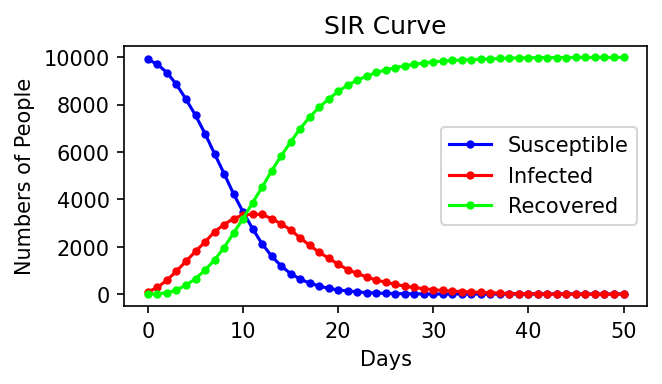

In [19]:
sir = Automata_SIR(100, 100)
# automata.printMatrix(cmap_SIR, labels_SIR)
print(f"Total People: {sir.numpeople}")
print(f"Initial Patient Number: {sir.getI()}")
sir.accumulateData()
for n in range(50):
    # if n in [0, 24, 49]:
    #     sir.printMatrix(sir.getPeopleState(), cmaps["SIR"], labels["SIR"])
    sir.nextGeneration()
    sir.accumulateData()
sir.plotCurve()

### SEIR

Total People: 10000
Initial Patient Number: 90


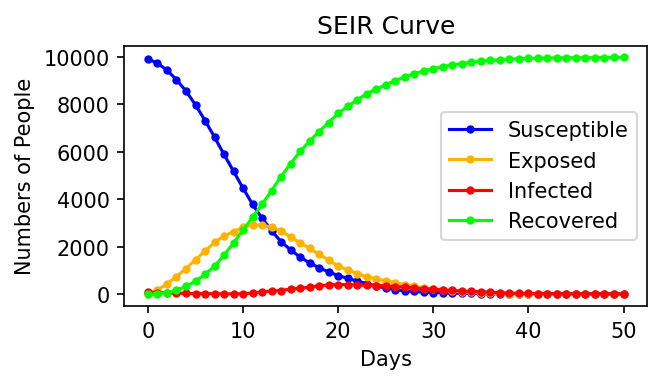

In [20]:
seir = Automata_SEIR(100, 100)
print(f"Total People: {seir.numpeople}")
print(f"Initial Patient Number: {seir.getI()}")
seir.accumulateData()
for n in range(50):
    seir.nextGeneration()
    seir.accumulateData()
# seir.printMatrix(cmaps["SEIR"], labels["SEIR"])
seir.plotCurve()

### SEIRD

Total People: 10000
Initial Patient Number: 104


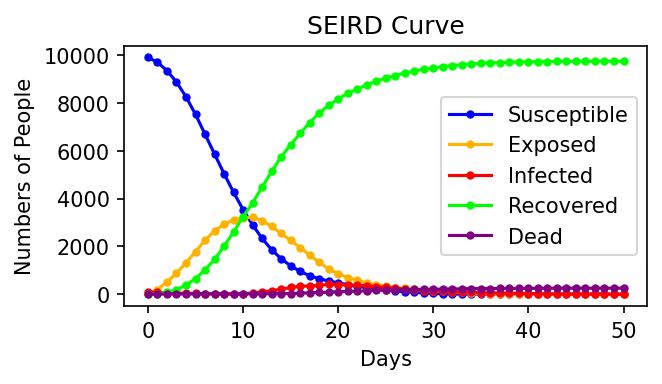

In [21]:
seird = Automata_SEIRD(100, 100)
print(f"Total People: {seird.numpeople}")
print(f"Initial Patient Number: {seird.getI()}")
seird.accumulateData()
for n in range(50):
    seird.nextGeneration()
    seird.accumulateData()
# seird.printMatrix(cmaps["SEIRD"], labels["SEIRD"])
seird.plotCurve()

# Agent-Based Model

## Model Building
In Agent-Based Model, agents represents an entity with individual states and behaviors. At the beginning of ABM, we built a agent Person in the program to keep record of the location of the person and state/prestate to enable the program to update "States" in each time generation and disease spreading logistic. 

In SEIRD model, 0: susceptible, 1: exposed, 2: infectious, 3: recovered, 4: dead. Other than that, each person has a medical attribute object attribute storing important information in wearing mask/vaccinating/hospitalizing, etc.

In [22]:
class Person:
    """
    class Person:
        Serving as an agent in the ABM. 
        Each Person would represent each individuals within our simulation.

    @attrs: 
    state: int (0: susceptible, 1: exposed, 2: infectious, 3: recovered, 4: dead, 5: dummy)
    prevState: int
    grid_location: tuple (ex. (x,y))
    medical: dict (ex. {mask: False, vaccinated: False, hospitalized: False, incubation: 0})
    """
    def __init__(self, id:int, state:int, prevState:int, medical:dict={}):
        self.id = id
        self.state = state
        self.prevState = prevState
        self.grid_location = None
        self.association = {"office": None, "house": None}
        if (not medical):
            self.medical = {
                "mask": False,
                "vaccinated": False,
                "hospitalized": False,
                "incubation": 7,
                "zombie": False
            }
        else:
            self.medical = medical

Once we finished building agent class, the topology of our ABM model requires Cell Class to model the cells in the grid. 

In [23]:
from Agent_Based_Model.Constant.constant import *
class Cell:
    """
    class Cell:
        Serving as a cell within the grid topology in the ABM.

    @attrs: 
    grid_location: tuple (ex. (x,y))
    """
    def __init__(self, grid_location:tuple):
        self.grid_location = grid_location

From our topology, we have hospital, office, house, and path on the grid map to model what would a real would look like. It is worth noting that each class is inherited from Cell class. Thus, they share the grid_location attribute and various getter and setter functions (Shown in the GitHub repository)
Each house and office have a fixed number of memebers. For example, our default number of people is 1000. Therefore, the default number of family member is 4 and number of employee is 40. However, there will be only one hospital in our small world. Therefore, the default of the hospital capacity is up to the total population in the system.

In [24]:
class Hospital(Cell):
    """
    class Hospital:
        Serving as a hospitalcell within the grid topology in the ABM.

    @attrs: 
    (super)
    grid_location: tuple (ex. (x,y))
    (self)
    capacity: int
    patients: list (a list of Person class)
    """
    def __init__(self, grid_location:tuple, patients:list=[]):
        super().__init__(grid_location)
        self.capacity = sys.maxsize
        self.patients = patients

class House(Cell):
    """
    class House:
        Serving as a house cell within the grid topology in the ABM.

    @attrs: 
    (super)
    grid_location: tuple (ex. (x,y))
    (self)
    capacity: int
    members: list (a list of Person class)
    """
    def __init__(self, id:int, grid_location:tuple, members:list=[]):
        super().__init__(grid_location)
        self.id = id
        self.capacity = HOUSE_SIZE
        self.guests = []
        self.members = members #[...<person>]
      
class Office(Cell):
    """
    class Office:
        Serving as an office cell within the grid topology in the ABM.

    @attrs: 
    (super)
    grid_location: tuple (ex. (x,y))
    (self)
    capacity: int
    employees: list (a list of Person class)
    """
    def __init__(self, id:int ,grid_location:tuple):
        super().__init__(grid_location)
        self.id = id
        self.CA = []
        self.employees = []
        self.guests = []
        self.capacity = OFFICE_CAPACITY

class Path(Cell):
    """
    class Path:
        Serving as a path cell within the grid topology in the ABM.

    @attrs: 
    (super)
    grid_location: tuple (ex. (x,y))
    (self)
    capacity: int
    passengers: list (a list of Person class)
    """
    def __init__(self, grid_location:tuple, passengers:list=[], capacity:int=0):
        super().__init__(grid_location)
        self.capacity = capacity
        self.passengers = passengers #[...<person>]

After finishing with components, we are now building a system class object where all the previous components would be utilized here and it is asle the class where the time progrssiona and disease transmission happens.

* In the first group of the instance variables, self.world represents a matrix storing all the path/house/office/hospital objects. The rows and cols decide the hight and the width of the grid. Time records time progession in the system (unit: hour).

* Self.people/dead(dead peple)/offices/houses/hospitals/paths stores the respective objects in an array for a better use in the later functions.

* There are some variables are especially set up for plotting purposes. In SEIRD model, the nubmer of each states is required to be recorded.

In ABM and SEIRD model, most of the occurences in the logitcal event are decided by several constants, which could be used to decide the frequency of a certain event or the number of the states or objects in the system. 

**It is worth noting we also put the constant variable in the argument section. It enable users to pass in different constant to model a different world in a more efficient way of programming.**


In [58]:
class ABM:
    def __init__(self, numcols: int=100, numrows: int=100,
                 zombieMode: bool=False, INIT_INFECTED=INIT_INFECTED,
                 INFECTION_RATE=INFECTION_RATE, INCUBATION_DAYS=INCUBATION_DAYS,
                 EXPOSED_RATE=EXPOSED_RATE, RECOVERY_RATE=RECOVERY_RATE,
                 DEATH_RATE=DEATH_RATE, WEAR_MASK=WEAR_MASK,
                 WEAR_MASK_POPULATION=WEAR_MASK_POPULATION, VACCINATED=VACCINATED,
                 VACCINATED_POPULATION=VACCINATED_POPULATION,
                 HOSPITALIZED=HOSPITALIZED, BEFORE_HOSPITAL=BEFORE_HOSPITAL):
        self.world = []
        self.rows = numrows
        self.cols = numcols
        self.time = 0
        self.people = []
        self.dead = []
        self.offices = []
        self.houses = []
        self.hospitals = []
        self.paths = []

        # Zombie Mode
        self.zombies = []
        self.zombieMode = zombieMode
        self.zombies_arr = []

        # Plotting Purposes - Keep Record of the number of SEIRD in every hour
        self.s_arr = []
        self.e_arr = []
        self.i_arr = []
        self.r_arr = []
        self.d_arr = []
        self.days = []
        self.mask_arr = []
        self.vaccinated_arr = []
        self.hospitalized_arr = []

        # Constants
        self.INIT_INFECTED = INIT_INFECTED
        self.INFECTION_RATE = INFECTION_RATE
        self.INCUBATION_DAYS = INCUBATION_DAYS
        self.EXPOSED_RATE = EXPOSED_RATE
        self.RECOVERY_RATE = RECOVERY_RATE
        self.DEATH_RATE = DEATH_RATE
        self.WEAR_MASK = WEAR_MASK
        self.WEAR_MASK_POPULATION = WEAR_MASK_POPULATION
        self.VACCINATED = VACCINATED
        self.VACCINATED_POPULATION = VACCINATED_POPULATION
        self.HOSPITALIZED = HOSPITALIZED
        self.BEFORE_HOSPITAL = BEFORE_HOSPITAL

        for i in range(self.rows):
            column = []
            for j in range(self.cols):
                column.append(None)
            self.world.append(column)


In order to create various objects such as houses and offices onto the grid map, we need a starting function called createWorld() to generate the peopulation and the locations objects. The "create" function details are shown in the Github repository.

In [26]:
def createWorld(self, num_people):
        """
        Hello World!
        - Generate random Location Object (House, Office, Path)
            - Each object should cannot locate in the same cell.
            - House contains a fixed number (default=4) of Person as a family
            - Office contains a fixed number (default=40) of Person as a Company
        - Generate a fixed number (default=1000) of Person in the world
            - A part of the people are infected with COVID-19 in the first day
            - The number of the initial patients are decided by a rate in the constant, thus, the number varies in each simulation
        """
        self.createPeople(num_people)
        self.createHouse(num_people)
        self.createOffice(num_people)
        self.createHospital()
        self.createPath()

However, it is worth mentioning createOffice() function here in the notebook. First of all, an office on a cell does not plainly represent a single cell. We actually implement another grid onto the cell where the office is located. This additional grid will work in a rule of Cellular Automata as our stage one model. The reason of implmenting Cellular Automata here is that we would like to simulate the disease transmission in a closed space. Creating a CA allow the person to be infected by their neighbors which is similar to the real world situation.

In createOffice() funciton , basically the program generates coordinates randomly with generate_coord() function and then to check whether there is an exising location on that specific cell or not. If not, then we create an office object there and call the init_CA() function to generate a CA system within a grid.

In [56]:
# class ABM
def createOffice(self, num_people):
        """
        Randomlize create office for ABM according to the params
        @params:
        num_people: int
        (num_house = num_people/40)
        """
        arr = self.people.copy()
        random.shuffle(arr)
        for i in range(int(num_people/OFFICE_CAPACITY)):
            while True:
                randomRow, randomCol = self.generate_coord()
                if not self.world[randomRow][randomCol]:
                    # print(f"Office: {i}, ({randomRow}, {randomCol})")
                    self.world[randomRow][randomCol] =  \
                        Office(id=i,grid_location=(randomRow, randomCol))
                    self.offices.append(self.world[randomRow][randomCol])
                    # 1. Fill in employees
                    self.world[randomRow][randomCol].setEmployees(
                        arr[i*OFFICE_CAPACITY: OFFICE_CAPACITY*(i+1)])
                    # 2. Create CA in Office
                    self.world[randomRow][randomCol].init_CA(self.INFECTION_RATE,
                                                             self.WEAR_MASK,
                                                             self.VACCINATED)

                    for person in arr[i*OFFICE_CAPACITY: OFFICE_CAPACITY*(i+1)]:
                        person.setOffice(self.world[randomRow][randomCol])
                    break

# class Office
def init_CA(self, INFECTION_RATE=INFECTION_RATE, WEAR_MASK=WEAR_MASK, \
            VACCINATED=VACCINATED):
        """
        Initialize the Cellular Automata model within each cell of our ABM grid.
        Serving as an inner grid within each cells.
        """
        # (8, 5) -> Hard Code
        self.CA = Automata(8, 5, self.employees, INFECTION_RATE=INFECTION_RATE, 
                           WEAR_MASK=WEAR_MASK, VACCINATED=VACCINATED)
  
class Automata:
    def __init__(self, rows:int, cols:int, employees:list, \
                 INFECTION_RATE=INFECTION_RATE, WEAR_MASK=WEAR_MASK, \
                 VACCINATED=VACCINATED):
        self.rows = rows
        self.cols = cols
        self.numpeople = rows * cols
        self.people = []
        self.num_zombies = 0

        for i in range(rows):
            row = []
            for j in range(cols):
                person = employees[i*cols + j]    
                row.append(person) 
            self.people.append(row)
        
        self.INFECTION_RATE = INFECTION_RATE
        self.WEAR_MASK = WEAR_MASK
        self.VACCINATED = VACCINATED

## Disease Transmission
After building a world in Agent-Based Model, we need a function to iterate the disease transmission and event occuring logistics.
First, let's discuss what are the state transitions in SEIRD model and how are the states changed during simulation.

1. Susceptible (State = 0) -->  Exposed (State = 1)
    - When people are exposed to the presence to patients, program will decide whether a person is infected by the virus according to the INFECTED_RATE constant that we set up after creating the ABM model. If the rate is higher, the chance of getting infected will be higher. Once a person is exposed to the virus, the person has the infecting ability towards other healthy people but yet they have no symptoms at all.

2. Exposed (State = 1) --> Infected (State = 2)
    - There is an incubation day (default = 7 days) in between Exposed state and Infected state. After the incubation days, program will decide whether a person is infected by the virus according to the EXPOSED_RATE.

3. Infected (State = 2) --> Recovered (State = 3)

4. Infected (State = 2) --> Dead (State = 4)

    - The patients could either stay as infected or become recovered or dead according to each probability respectively.

**Noting that number of the patients (Eposed or Infected) in the same space will increase the infected rate for susceptible people.**

In [57]:
def applyRules(self, person:Person, currentHour:int, currentDay:int,
               num_Contact_withMask:int=0, num_Contact_noMask:int=0,
               num_Contact_zombie:int=0):
        """
        Rules of SEIRD model to apply for ABM
        @params:
        person: Person (individuals)
        currentHour: int (the current hour time)
        """
        chance = random.random()
        # Susceptible: 0
        if person.getPrevState() == 0:
            infected_rate = self.INFECTION_RATE
            if person.getMask():
                infected_rate *= self.WEAR_MASK
            if person.getVaccinated():
                infected_rate *= self.VACCINATED
            if chance > (1 - infected_rate*self.WEAR_MASK)**num_Contact_withMask \
             * (1 - infected_rate)**(num_Contact_noMask + num_Contact_zombie):
                person.setState(1)
                # print("Exposed: S->E, Person: ", person.getID())
        
        elif currentHour == 0 and currentDay != 0:
            # Exposed: 1
            if person.getPrevState() == 1:
                if person.getIncubation() > 0:
                    person.decreaseIncubation()
                elif chance <= self.EXPOSED_RATE and person.getIncubation() == 0:
                    person.setState(2)
                    # print("Infected: E->I, Person: ", person.getID())

            # Infectious: 2
            elif person.getPrevState() == 2:
                # Version 1 
                if chance <= self.RECOVERY_RATE:
                    # Recovered: 3
                    person.setState(3)
                elif chance <= self.DEATH_RATE + self.RECOVERY_RATE:
                    # Dead: 4
                    person.setState(4)
                    if (self.zombieMode):
                        person.setZombie(True)
            
            # Recovered: 3 (Only effected in zombie mode)
            elif person.getPrevState() == 3 and self.zombieMode:
                infected_rate = self.INFECTION_RATE
                if person.getMask():
                    infected_rate *= self.WEAR_MASK
                if person.getVaccinated():
                    infected_rate *= self.VACCINATED
                if chance > (1 - infected_rate*self.\
                             WEAR_MASK)**num_Contact_withMask \
                             * (1 - infected_rate)**(num_Contact_noMask \
                                                     + num_Contact_zombie):
                    person.setState(1)

nextGeneration(), a instance method in ABM class, would be called in each iteration as the time (hour) increases. There are four steps in each iteration 

1. Move to the "next" generation

    - Recall that each Agent Person has "state" and "prevState" representing SEIRD status. Thus, in the begining of the iteration. The system will record the current state into the prevState in order to modify the current state in the later logistic
    
2. Time Check - Actions vary in different hour

    - In a day of modeling world, there are schedule tasks for the agent Person to simulate the real world actions.
  
    - 19:00 - 06:59 -> Home

        - During the time home, each person stays at the grid_location where their own houses are located. Noting that people could be easily infected by the family members. applyRules() will be implemented at 00:00 to decide the new infected patients in each families.

    - 07:00 - 08:59 -> Commute (Random Walk)

        - During commute period, each person walks randomly from their own houses locations to neighboring cells. People walk two steps during this period. When People step in the same cell, there might be an infection occurring.

    - 09:00 - 16:59 -> Work

        - Each person belongs to a company, a office object on the grip map. The first thing in the step will be updating the grid_location for each person in the model. In addition, people are contacting with their colleagues at work. The topology in the offce is also a grid map where we use to simulate the neighboring colleagues. It is worth noting that the infecting process is differnt from the preious code block. Yet, it is very similar to our Cellular Automata infecting process. The neiboring infected person decides the risk of getting infected at work.

    - 17:00 - 18:59 -> Commute / Happy (Random Walk)

        - The step is very similar to the first commute period. The only difference will be the starting point is from the office's grid_location.
    
    - **Noting that number of the patients (Eposed or Infected) will increase the infecting rate for susceptible people.**

3. Update at 00:00 

    - In the beginning of a day, the program will execute the following actions

        - Removed dead people from the houses

        - Hospitalized and Checkout Patients from the hospital

        - Keep record of SEIRD numbers for plotting purposes

4. Time Progression

    - In each iteration of calling nextGeneration(), the time increment will be 1 hour in the modeling. But, **it is worth noting here that some of the event occurs in a daily basis. Therefore, this is a fixed time for certains actions or events to occur.**

In [55]:
def nextGeneration(self):
        """
        1. Move to the "next" generation
        2. Time Check - Actions vary in differnt hour
            - 1900 - 0659 -> Home
            - 0700 - 0859 -> Commute (Random Walk)
            - 0900 - 1659 -> Work
            - 1700 - 1859 -> Commute / Happy (Random Walk)
        3. Update at 00:00
            - Remove dead people
            - Get daily SEIRD data
            - Wear Mask/Get Vaccinated/Hospitalized
            - Recovery (Implemented in applyRules)
        4. Time Progression (hourly)
        """
        # 1. Move to the "next" generation
        for i in range(len(self.people)):
            self.people[i].copyState()
    
        currentDay = self.getDay()
        currentHour = self.getHour()

        # 3. Update at 00:00
        if currentHour == 0:
            self.removeDead()
            if currentDay >= self.BEFORE_HOSPITAL: 
                self.hospitalized()
                self.checkOutHospital(currentHour, currentDay)
            self.accumulateData()
        
        # zombie walks around all the time
        if self.zombieMode:
            self.walkingDead()

        # 2. Time Check - Actions vary in differnt hour
        # Home
        if currentHour in HOME_TIME:
            # 1. Check current location:
            # Check time: 19:00 & the initial time (first hour of the first day)
            if currentHour == 19 or (currentHour == 0 and currentDay == 0):
                for person in self.people:
                    # Only Check People not in hospital from self.people
                    if not person.getHospitalized():
                        person.setGridLocation(
                            person.getHouse().getGridLocation())

            # 2. Speard of virus at 00:00 per day
            if (currentHour%24) == 0:
                # print(f"Day: {currentDay}")
                for house in self.houses:
                    # Get healthy and infected people
                    healthyPeople = []
                    patients_mask = 0
                    patients_no_mask = 0
                    zombies = self.locatingZombies(
                        house.getGridLocation(),currentHour)
                    for person in house.getMembers():
                        # Only Check People not in hospital from self.people
                        if not person.getHospitalized():
                            if person.getState() == 0 or person.getState() == 3:
                                healthyPeople.append(person)
                            elif person.getState() == 1 or person.getState() == 2:
                                if person.getMask():
                                    patients_mask += 1
                                else:
                                    patients_no_mask += 1
                                # Exposed or Infected Person could turn infected/recoverd/death
                                self.applyRules(person, currentHour, currentDay)

                    # Infect healthy people
                    for person in healthyPeople:
                        if self.zombieMode:
                            self.applyRules(person, currentHour, currentDay,
                                            patients_mask, patients_no_mask,
                                            zombies)
                        else:
                            self.applyRules(person, currentHour, currentDay,
                                            patients_mask, patients_no_mask)
            
            # 3. Wear mask before going to work
            if currentHour == 6:
                self.wearMask(currentDay)
            elif currentHour == 19:
                self.takeDownMask()
                self.vaccinated()

        # Commute
        elif currentHour in COMMUTE_TIME:
            # 1. Check current location
            self.randomWalk()
            # Let the walking dead rise
            if self.zombieMode:
                self.walkingDead()

            # 2. Spread of virus
            '''
            InfectedGrid (dict) store the
                key: location (tuple) 
                value: total number of infected people on that location
            If there is an exposed or infected person on that location, the value will plus 1.
            '''
            infectedGrid = {}
            for person in self.people:
                # Only Check People not in hospital from self.people
                if person.getState() in [1,2] and not person.getHospitalized():
                    if person.getGridLocation() not in infectedGrid.keys():
                        infectedGrid[person.getGridLocation()] = {
                            "mask": 0,"no_mask": 0, "zombie": 0}
                    if person.getMask():
                        infectedGrid[person.getGridLocation()]["mask"] += 1
                    else:
                        infectedGrid[person.getGridLocation()]["no_mask"] += 1
            
            if self.zombieMode:
                infectedGrid = self.locatingZombies(infectedGrid, currentHour)

            '''
            Loop through each person. If the person is susceptible 
            and stand on same location with infected or exposed people, we 
            applied the applyRules function
            '''
            for person in self.people:
                # Only Check People not in hospital from self.people
                if person.getState() in [0,3] and person.getGridLocation() in \
                    infectedGrid.keys() and not person.getHospitalized():
                    num_mask = infectedGrid[person.getGridLocation()]['mask']
                    num_no_mask = infectedGrid[person.getGridLocation()]['no_mask']
                    if self.zombieMode:
                        num_zombie = infectedGrid[person.getGridLocation()]['zombie']
                        if person.getState() == 3:
                            self.applyRules(person, currentHour, currentDay, \
                                            num_Contact_zombie=num_zombie)
                        else:
                            self.applyRules(person, currentHour, currentDay, \
                                            num_mask, num_no_mask, num_zombie)               
                    else:
                        self.applyRules(person, currentHour, currentDay, \
                                        num_mask, num_no_mask)

        # Work
        elif currentHour in WORK_TIME:
            # 1. Check current location
            if currentHour == 9:
                for person in self.people:
                    # Only Check People not in hospital from self.people
                    if not person.getHospitalized():
                        person.setGridLocation(
                            person.getOffice().getGridLocation())
            # 2. Spread of virus
            for office in self.offices:
                # CA Version
                if (currentHour%12)==0:
                    if (self.zombieMode):
                        num_zombies = self.locatingZombies(
                            office.getGridLocation(), currentHour)
                        office.appendZombies(num_zombies)
                    else:
                        office.appendDummies()
                    office.getCA().updateGrid(office.getEmployees())
                    office.getCA().nextGeneration()
                    office.clearDummies()

        # 4. Time Progression (hourly)
        self.time += 1

Here are the functions that are already implemented in the nextGeneration(), yet they have not been discussed or mentioned. In our project goal, we would like to see the influence of wearing masks/vaccine/hospitalized on the virus outbreak and the SEIRD curve.

1. Mask

    - There will be a ratio of people wearing masks decided by WEAR_MASK_POPULATION. And the number of population increases as the day goes by. Since, in the real world, people are gradually getting aware of the importance of the masks on blocking the virus transmission among people.

    - In our simulation, people wear masks at all locations except home.

    - Mask has an influence on dropping the infected rate during applyRules() calling

2. Hospital

    -  At 00:00, the program puts a ratio of infected patients (State = 4) into the hospital. On the other hand, it will also remove the people that are recovered during their time at the hospital

3. Vaccine

    - There will be a ratio of people vaccinated decided by VACCINATED_POPULATION. And the number of population increases as the day goes by. Since, in the real world, people are gradually getting vaccinated
    

In [40]:
def wearMask(self, currentDay:int):
        """
        Implement random portion of the people to wear mask
        Time: COMMUTE hours and OFFICE hours
        @rtn
        count: int (number of people wore mask)
        """
        # wear_rate = 0.01
        # new_wear_rate = 0.01 + 0.01*currentday
        total = 0
        if self.WEAR_MASK_POPULATION == 0:
            return
        percent = self.WEAR_MASK_POPULATION+(currentDay*0.01)
        for p in self.people:
            if not (p.getState() in [4,5]):
                chance = random.random()
                if chance <= percent:
                    p.setMask(True)
                if p.getMask():
                    total += 1
        self.mask_arr.append(total)

def takeDownMask(self):
        """
        Implement all people take dowm mask when returning their home
        Time: HOME hours
        """
        for p in self.people:
            p.setMask(False)

def vaccinated(self):
        """
        Implement random portion of the people to get vaccinated
        @rtn
        count: int (number of people got vaccinated)
        """
        total = 0
        def filterVaccine(person):
            if (not person.getVaccinated() and person.getState() not in [3, 4, 5]):
                return True
            else:
                return False  
        new_people = list(filter(filterVaccine, self.people))

        for p in new_people:
            chance = random.random()
            if chance <= self.VACCINATED_POPULATION:
                p.setVaccinated(True)
                total += 1
        
        prev = 0 if len(self.vaccinated_arr) == 0 else self.vaccinated_arr[-1]
        self.vaccinated_arr.append(prev+total)

def hospitalized(self):
        """
        Implement function to put infected population into hospital, hospitalized
        Time: HOME hour
        """
        def filterInfected(person):
            if person.getState() == 2:
                return True
            else:
                return False

        infected_pp = list(filter(filterInfected, self.people))
        
        for p in infected_pp:
            chance = random.random()
            if chance <= self.HOSPITALIZED:
                p.setHospitalized(True)
                p.setGridLocation(self.hospitals[0].getGridLocation())
                self.hospitals[0].checkIn(p)
              
def checkOutHospital(self, currentHour, currentDay):
        """
        Implement people that are hospitalized can recover and return back home
        Time: HOME hour
        """
        patients = self.hospitals[0].getPatients()
        
        for p in patients:
            self.applyRules(p, currentHour, currentDay)
            # Check out recovered people from the hospital
            if (p.getState() == 3):
                house_loc = p.getHouse().getGridLocation()
                p.setGridLocation(house_loc)
                p.setHospitalized(False)
                self.hospitals[0].checkOut(p)

## Simulation & Analysis

In [70]:
from Agent_Based_Model.ABM import *
from Visualization.Plotting import *

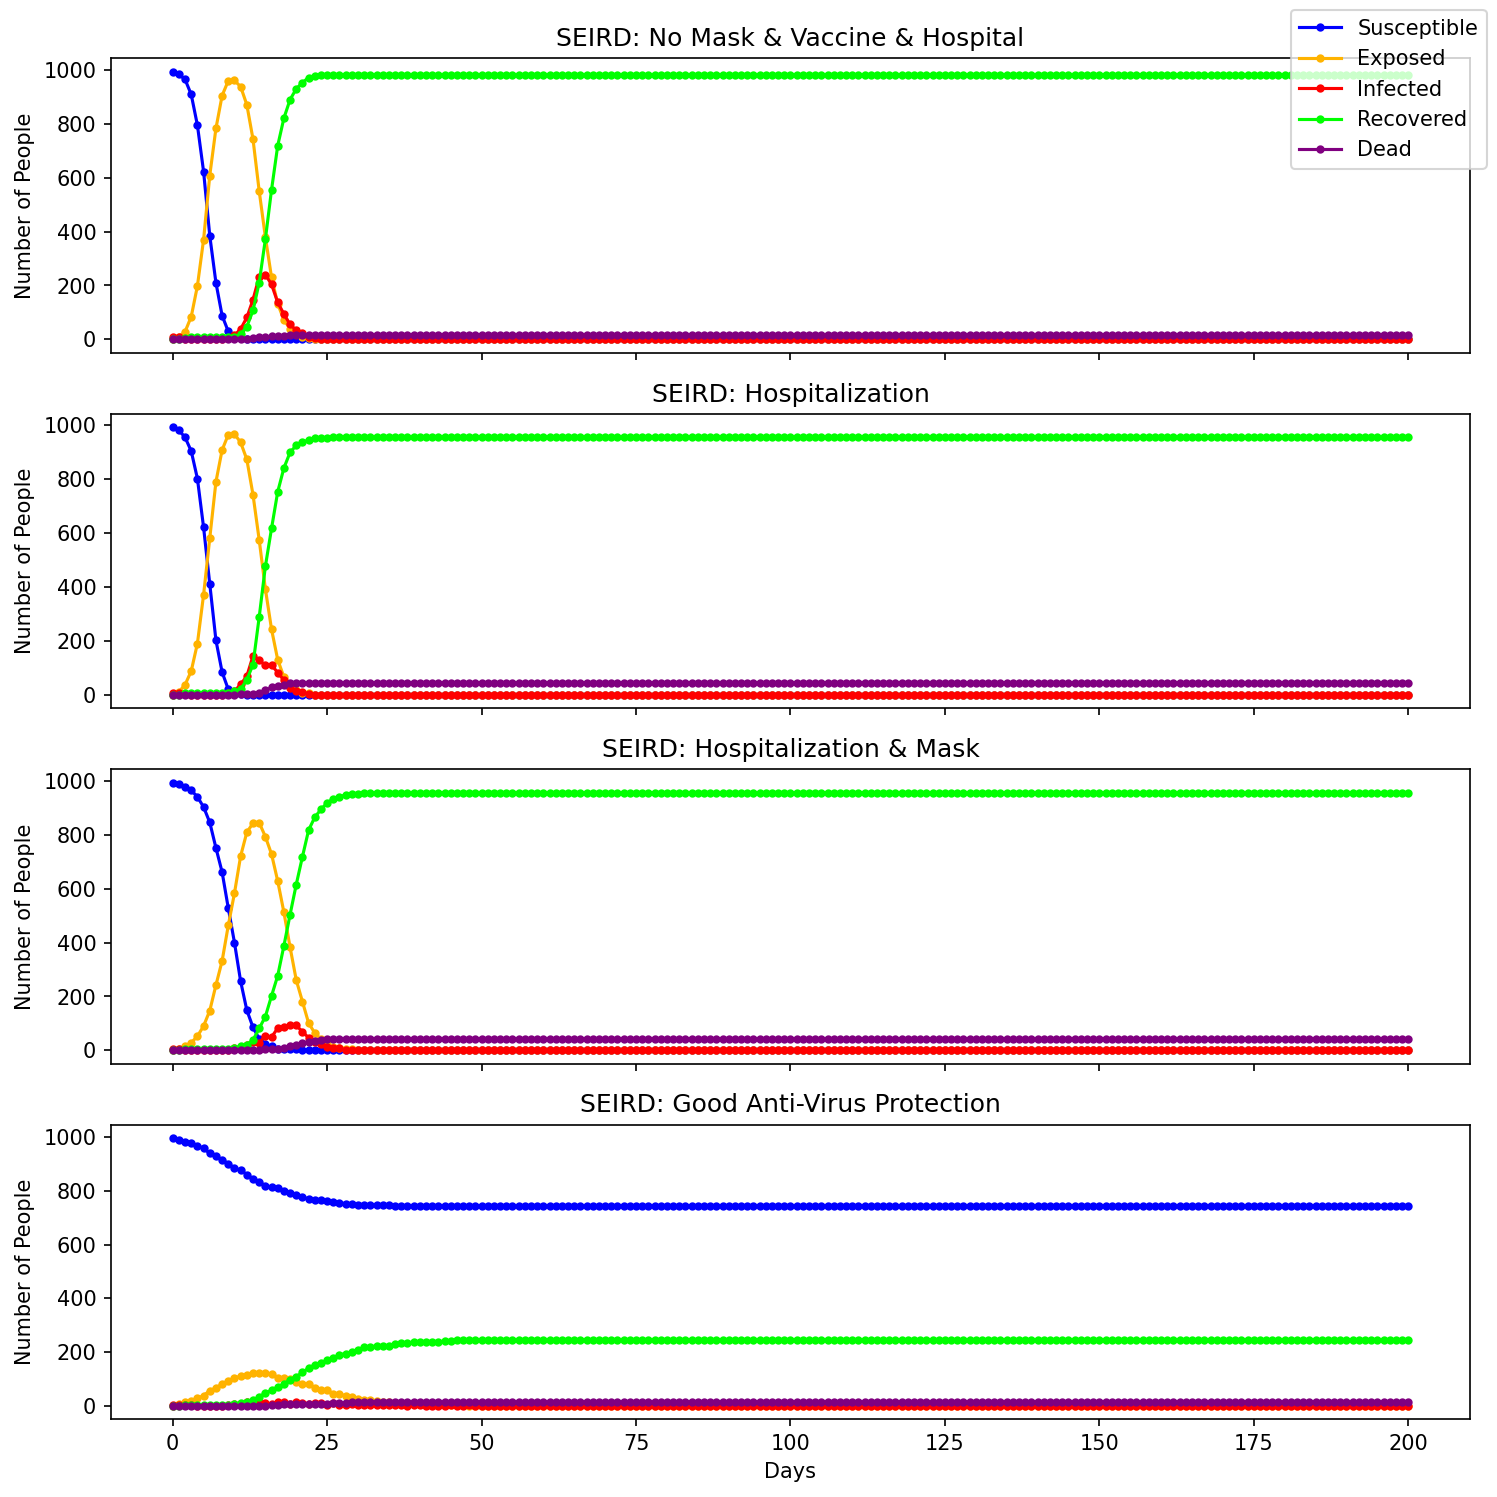

In [69]:
day = 200
hour = (day+1)*24

"""
ABM constant parameter adjustment

<Default>
INIT_INFECTED=0.005, INFECTION_RATE=0.1, EXPOSED_RATE=0.5, RECOVERY_RATE=0.75,
SUSCEPTIBLE_RATE=0.1, DEATH_RATE=0.02, WEAR_MASK=0.5, WEAR_MASK_POPULATION=0.5,
VACCINATED=0.1, VACCINATED_POPULATION=0.5, HOSPITALIZED=0.5, BEFORE_HOSPITAL=14
"""

world1 = ABM(INFECTION_RATE=0.1, EXPOSED_RATE=0.5, DEATH_RATE=0.02, 
             RECOVERY_RATE=0.75, WEAR_MASK_POPULATION=0,
             VACCINATED_POPULATION=0, HOSPITALIZED=0)
world1.createWorld(num_people=1000)

world2 = ABM(INFECTION_RATE=0.1, EXPOSED_RATE=0.5, DEATH_RATE=0.02,
             RECOVERY_RATE=0.75, BEFORE_HOSPITAL=14, VACCINATED_POPULATION=0,
             WEAR_MASK_POPULATION=0)
world2.createWorld(num_people=1000)

world3 = ABM(INFECTION_RATE=0.1, EXPOSED_RATE=0.5, DEATH_RATE=0.02,
             RECOVERY_RATE=0.75, BEFORE_HOSPITAL=14, VACCINATED_POPULATION=0)
world3.createWorld(num_people=1000)

world4 = ABM(INFECTION_RATE=0.1, EXPOSED_RATE=0.5, DEATH_RATE=0.02,
             RECOVERY_RATE=0.75, BEFORE_HOSPITAL=14, WEAR_MASK_POPULATION=0.9,
             VACCINATED_POPULATION=0.1)
world4.createWorld(num_people=1000)

for h in range(hour):
    world1.nextGeneration()
    world2.nextGeneration()
    world3.nextGeneration()
    world4.nextGeneration()
    
plotCurves_main([world1.modelOutput("No Mask & Vaccine & Hospital"), 
                 world2.modelOutput("Hospitalization"), 
                 world3.modelOutput("Hospitalization & Mask"), 
                 world4.modelOutput("Good Anti-Virus Protection")])

# Extra - ZOMBIE APOCALPSE 🧟‍♂️

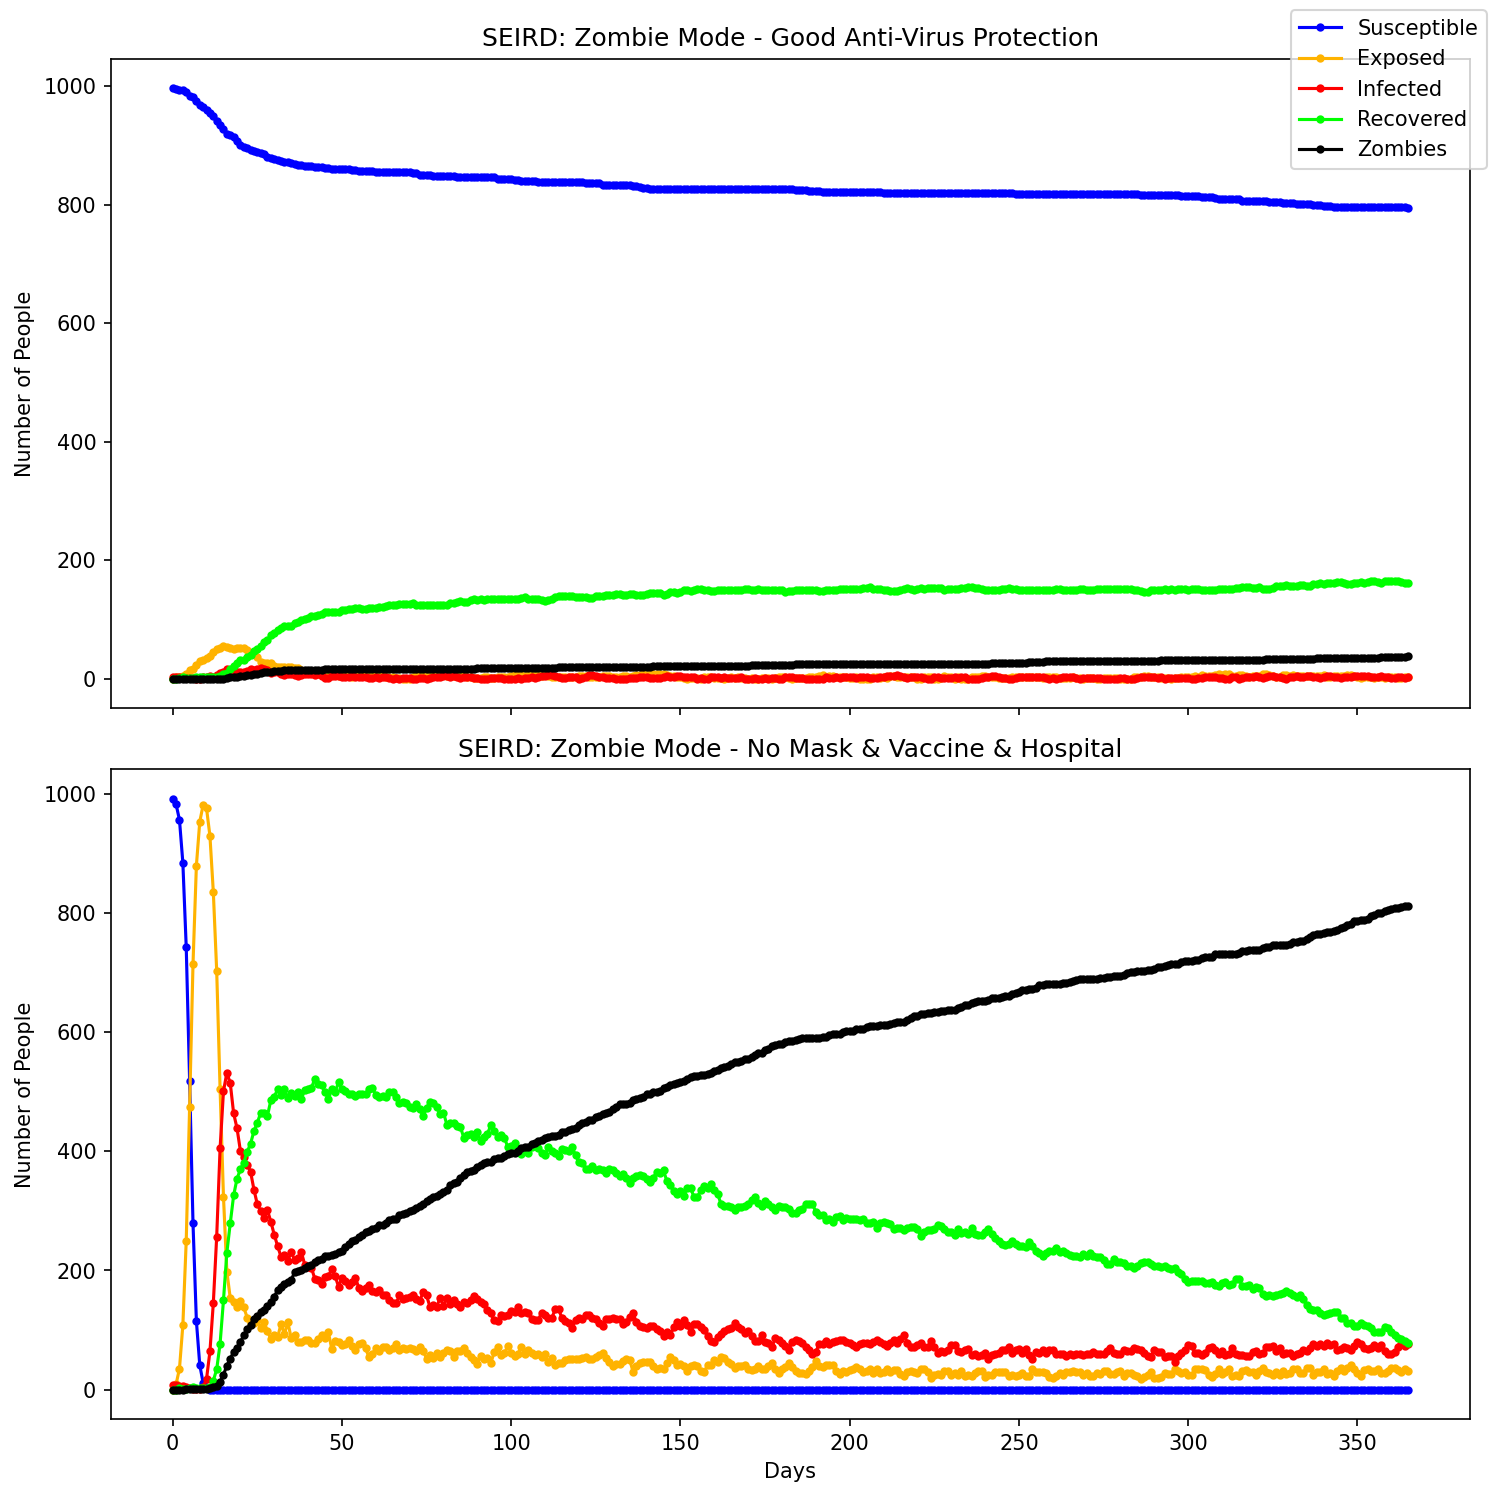

In [67]:
day = 365
hour = (day+1)*24

worldZ1 = ABM(INFECTION_RATE=0.1, EXPOSED_RATE=0.5, DEATH_RATE=0.02,
             RECOVERY_RATE=0.2, BEFORE_HOSPITAL=14, WEAR_MASK_POPULATION=0.9,
             VACCINATED_POPULATION=0.1, zombieMode=True)
worldZ1.createWorld(num_people=1000)

worldZ2 = ABM(INFECTION_RATE=0.1, EXPOSED_RATE=0.5, DEATH_RATE=0.02, 
             RECOVERY_RATE=0.2, WEAR_MASK_POPULATION=0,
             VACCINATED_POPULATION=0, HOSPITALIZED=0, zombieMode=True)
worldZ2.createWorld(num_people=1000)

for h in range(hour):
    worldZ1.nextGeneration()
    worldZ2.nextGeneration()

plotCurves_main([worldZ1.modelOutput("Zombie Mode - Good Anti-Virus Protection"),
                 worldZ2.modelOutput("Zombie Mode - No Mask & Vaccine & Hospital")])

# Conclusion

# Progress/Colaboration
[COVID Simulation Project Github](https://github.gatech.edu/phsu40/CSE6730-Covid-Simulation.git)

 We managed to store our code through Github and work daily on the project through VSCode's Live-Share extension. In terms of the progress, we had accomplished until this checkpoint was to explore various simulation models, such as SIR, SEIR, SEIRS, SEIRS, etc. These models were based on several references, including codes [6] and conceptual ideas [3][4] that helped us constructed these models and classes in Python. Our models were able to plot the Simulation curves, such as the SEIR curve through the constants and parameters we input. The displaying curves and plots do match our expectation of SIR-based models [5] would exhibit. In addition, we factored in attributes such as Death and incubation days [5] to further examine the correctness and possible outcomes to our models. That is to say, we are trying to have a comprehensive understanding of what model we would want to build our agent-based model on for our final project goal. 
 
 During the progress we made for this checkpoint, we also decided on details about our agent-based model. We have found a reference model [1] that we could build our ABS (Agent-Based Simulation) on with several essential modifications. These modifications include the design pattern of how individuals would interact on a high level and the impact of the personal protective equipment would have on the pandemic. 

# Division of Labor
All the work was done collaboratively and synchronously. Everyone shares an equal amount of the workload during this project.

# Reference: 
 * [1] [COVID-ABS: An agent-based model of COVID-19 epidemic to simulate health and economic effects of social distancing interventions](https://reader.elsevier.com/reader/sd/pii/S0960077920304859?token=315C3393A6229C5AB8B7E8566F6E4E5B127349BA76D369BBD3D20C20B63D7040A503CE8FE00D08BE6C459A2C817C57DC&originRegion=us-east-1&originCreation=20210411164718) [Source Code](https://github.com/petroniocandido/COVID19_AgentBasedSimulation)
 * [2] [Modeling and forecasting of COVID-19 using a hybrid dynamic model based on SEIRD with ARIMA corrections](https://www.sciencedirect.com/science/article/pii/S2468042720301032)
 * [3] [Measuring and Preventing COVID-19 Using the SIR Model and Machine Learning in Smart Health Care](https://www.hindawi.com/journals/jhe/2020/8857346/)
 * [4] [A Simulation of a COVID-19 Epidemic Based on a Deterministic SEIR Model](https://www.frontiersin.org/articles/10.3389/fpubh.2020.00230/full)
 * [5] [SEIR and SEIRS models](https://docs.idmod.org/projects/emod-hiv/en/latest/model-seir.html)
 * [6] [Simulate Covid-19 in your area with Python — beyond SIR models (Individual-Based-Simulation)](https://towardsdatascience.com/model-the-covid-19-epidemic-in-detail-with-python-98f0d13f3a0e)
 * [7] [Modeling COVID-19 scenarios for United States (mask no mask, death rate, SEIR)](https://www.nature.com/articles/s41591-020-1132-9#Sec7)
 * [8] [Python Coronavirus Simulation](https://github.com/paulvangentcom/python_corona_simulation)
 * [9] [A model based on cellular automata to estimate the social isolation impact on COVID-19 spreading in Brazil](*https://www.sciencedirect.com/science/article/pii/S0169260720316655)